In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn import model_selection

In [2]:
def compareAlgorithms(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        # testing
        print (precision_cv_results) # for testing only
        print (recall_cv_results) # for testing only
        print (f05_cv_results) # for testing only

        precision_results.append(precision_cv_results.mean())
        #print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        #print(recall_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        #print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f05_results, names

In [3]:
def compareCostSensitiveAlgorithms(X_train, y_train, weights):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression(class_weight=weights)))
    models.append(('SVM', SVC(class_weight=weights)))
    models.append(('Linear SVC', LinearSVC(class_weight=weights)))
    models.append(('DT', DecisionTreeClassifier(class_weight=weights)))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        #print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        #print(recall_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        #print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f05_results, names

In [4]:
def compareAlgorithmsRUS(X_train, y_train):
    from imblearn.under_sampling import RandomUnderSampler


    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    f05_results = []
    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        f05_results.append(f05_cv_results.mean())
        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, f05_results,names

In [5]:
def compareAlgorithmsSMOTE(X_train, y_train):
    from imblearn.over_sampling import SMOTE


    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    f05_results = []
    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        f05_results.append(f05_cv_results.mean())
        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    #print("F05 Results:",f05_results)
    
    return precision_results, recall_results,f05_results, names

In [69]:
def barChart(results, score, name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots()
    algorithms = ['LR', 'SVM', 'Linear SVM', 'DT']
    ax.bar(algorithms,results)
    ax.set_ylabel(score)
    ax.set_title(score)
    plt.ylim(0,1)
    
    # annotate bars
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName)
    
    plt.show()

In [7]:
def twoGroupsBarChart(results1, string1, results2, string2, score, name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, results1, width, label=string1)
    rects2 = ax.bar(x + width/2, results2, width, label=string2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    #label bars
    ax.bar_label(rects1, padding=3, fmt='%.2f', label_type='edge', fontsize=10)
    ax.bar_label(rects2, padding=3, fmt='%.2f', label_type='edge', fontsize=10)

    fig.tight_layout()

    
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName)
    
    
    plt.show()

In [64]:
def threeGroupsBarChart(results1, string1, results2, string2, results3, string3, score, name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'DT']

    y = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(y - width, results1, width, label=string1)
    rects2 = ax.barh(y, results2, width, label=string2)
    rects3 = ax.barh(y + width, results3, width, label=string3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_yticks(y, labels=labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    #ax.set_ylabel(labels)
    ax.set_title(score)
    ax.set_xlabel(score)
    #ax.set_xticklabels(labels)
    #ax.legend()
    
    #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.legend()
    
    
    # label bars
    ax.bar_label(rects1, padding=3, fmt='%.2f', label_type='edge', fontsize=10)
    ax.bar_label(rects2, padding=3, fmt='%.2f', label_type='edge', fontsize=10)
    ax.bar_label(rects3, padding=3, fmt='%.2f', label_type='edge', fontsize=10)

    fig.tight_layout()
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName)
    
    plt.show()

In [72]:
def plotROCCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import plot_roc_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []

    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_roc_curve(model, X_test, y_test, ax = plt.gca(), name = name)

        
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    
    #ax.legend(loc='lower right')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    plt.title(title)
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName, bbox_inches='tight')
    
    plt.show()

In [73]:
def plotPrecisionRecallCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []

    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_precision_recall_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        
        
    
    no_skill = len(y_test[y_test['0']==1]) / len(y_test)

    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    
    #ax.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
        
    plt.title(title)
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/resampling/' + fileName, bbox_inches='tight')
    
    plt.show()

In [9]:
# Function to plot a confusion matrix 
def conf_matrix(y_test, y_pred, title, fileName):    
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title(title)
    plt.savefig('figures/costSensitive/' + fileName)
    plt.show()
    
    print(classification_report(y_test, y_pred))

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

# Cost insensitve learning results

In [12]:
# make feature matrix and target matrix
X = pd.read_csv('BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [13]:
y.value_counts()

0
0    12039
1      938
dtype: int64

In [14]:
precision, recall, f05, names = compareAlgorithms(X_train, y_train)

[0.52173913 0.65       0.52631579 0.76923077 0.35714286]
[0.08       0.08666667 0.13333333 0.06666667 0.06666667]
[0.24793388 0.2826087  0.33112583 0.24752475 0.19083969]
[0.8        1.         1.         0.6        0.46153846]
[0.02666667 0.02666667 0.01333333 0.02       0.04      ]
[0.11764706 0.12048193 0.06329114 0.08823529 0.14851485]
[0.33333333 0.66666667 1.         0.5        0.375     ]
[0.01333333 0.04       0.02       0.00666667 0.02      ]
[0.05747126 0.16129032 0.09259259 0.03164557 0.08064516]
[0.20833333 0.20118343 0.225      0.16853933 0.16748768]
[0.23333333 0.20666667 0.28666667 0.19333333 0.22666667]
[0.21058315 0.21197007 0.23348519 0.17721519 0.15517241]


cost_insensitive_precision.png


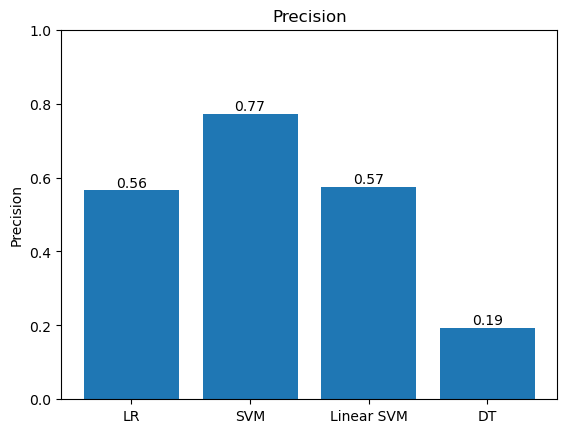

cost_insensitive_recall.png


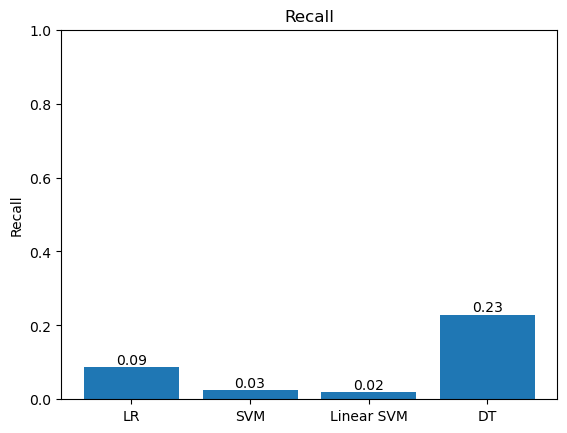

cost_insensitive_f05.png


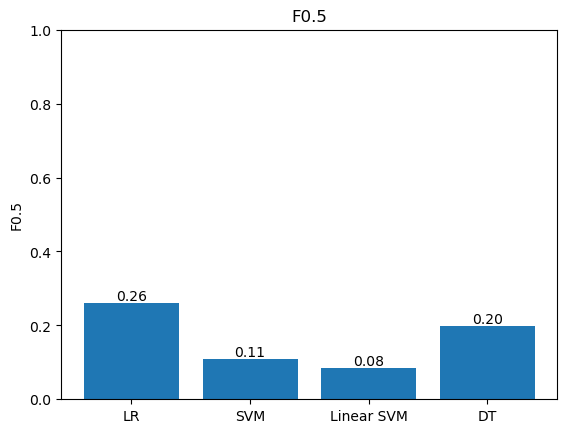

In [70]:
barChart(precision, "Precision", "cost_insensitive_precision")
barChart(recall, "Recall", "cost_insensitive_recall")
barChart(f05, "F0.5", "cost_insensitive_f05")

F0.5: 0.393
Recall: 0.149
Precision: 0.667


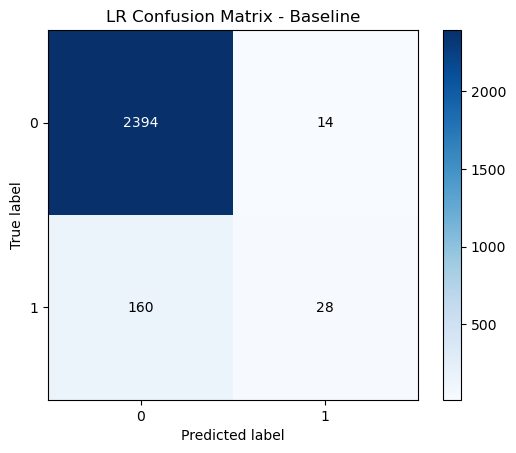

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2408
           1       0.67      0.15      0.24       188

    accuracy                           0.93      2596
   macro avg       0.80      0.57      0.60      2596
weighted avg       0.92      0.93      0.91      2596



In [16]:
# example of cost insensitive logistic regression for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# define model
model = LogisticRegression(random_state=42)
# fit model
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat, "LR Confusion Matrix - Baseline", "conf_matrix_lr_baseline")

# Cost Sensitive Learning Using class_weight='balanced'

In [17]:
cs_precision, cs_recall, cs_f05, names = compareCostSensitiveAlgorithms(X_train, y_train, 'balanced')

cost_sensitive_balanced_precision.png


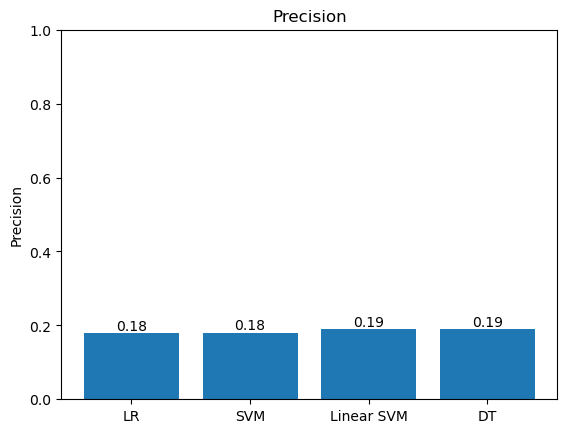

cost_sensitive_balanced_recall.png


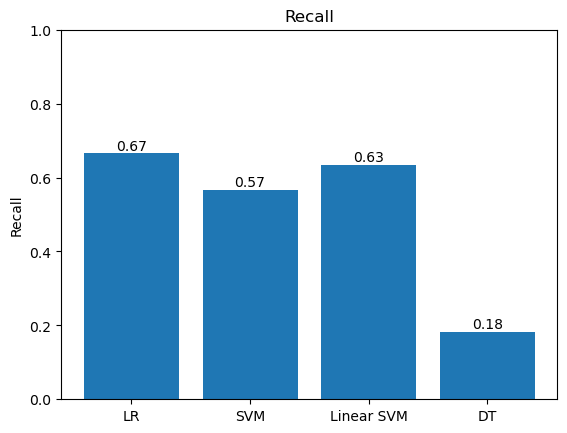

cost_sensitive_balanced_f05.png


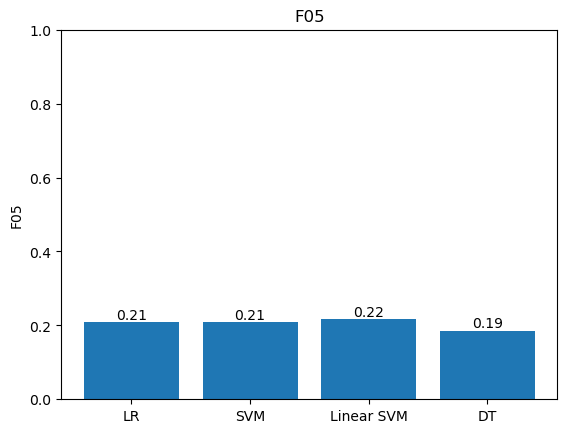

In [71]:
barChart(cs_precision, "Precision", "cost_sensitive_balanced_precision")
barChart(cs_recall, "Recall", "cost_sensitive_balanced_recall")
barChart(cs_f05, "F05", "cost_sensitive_balanced_f05")

F0.5: 0.211
Recall: 0.681
Precision: 0.180


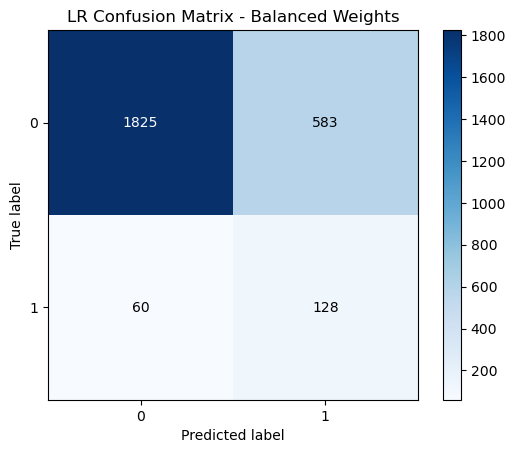

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2408
           1       0.18      0.68      0.28       188

    accuracy                           0.75      2596
   macro avg       0.57      0.72      0.57      2596
weighted avg       0.91      0.75      0.81      2596



In [19]:
# define model
model = LogisticRegression(class_weight='balanced' )
# fit model
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat, "LR Confusion Matrix - Balanced Weights","conf_matrix_lr_balancedWeights")

cost_senstive_vs_insensitive_recall.png


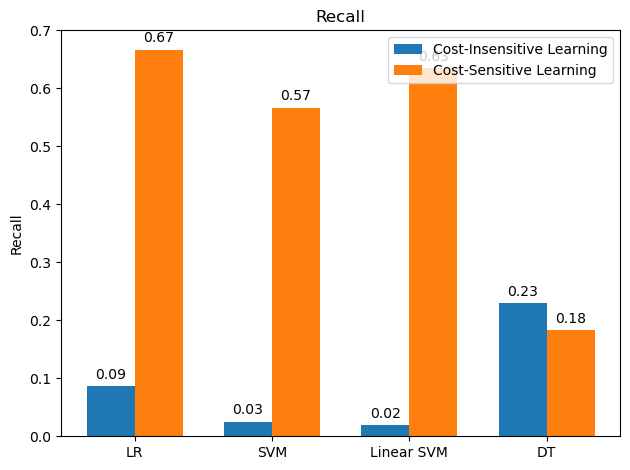

cost_senstive_vs_insensitive_precision.png


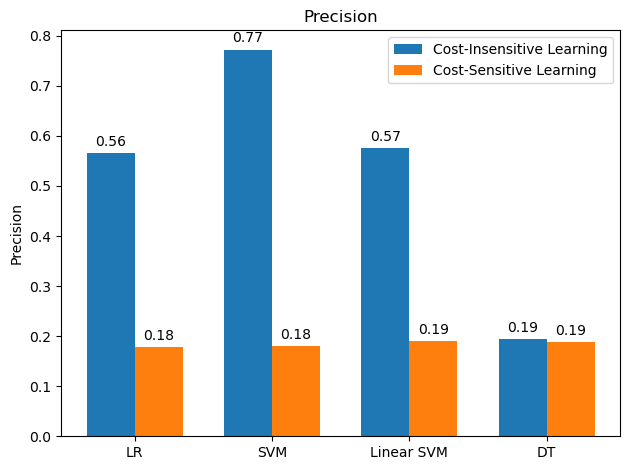

cost_senstive_vs_insensitive_f05.png


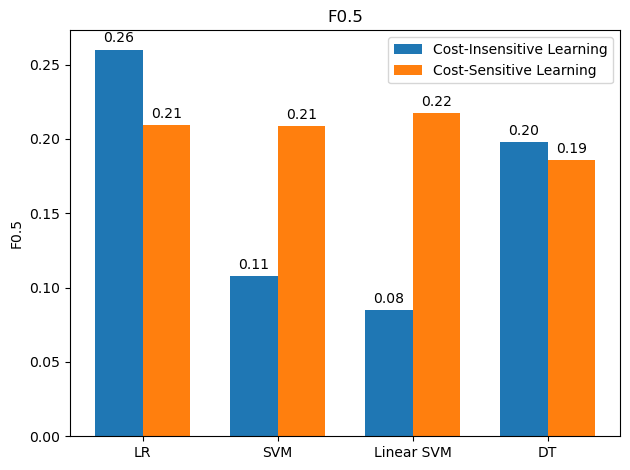

In [20]:
# plot cost sensitive vs. insensitive learning
twoGroupsBarChart(recall, "Cost-Insensitive Learning", cs_recall,
                  "Cost-Sensitive Learning", "Recall", "cost_senstive_vs_insensitive_recall")
twoGroupsBarChart(precision, "Cost-Insensitive Learning", cs_precision,
                  "Cost-Sensitive Learning", "Precision", "cost_senstive_vs_insensitive_precision")
twoGroupsBarChart(f05, "Cost-Insensitive Learning", cs_f05,
                  "Cost-Sensitive Learning", "F0.5", "cost_senstive_vs_insensitive_f05")

# Compare Cost Sensitive Learning with Data Resampling

In [21]:
sm_precision, sm_recall, sm_f05, names = compareAlgorithmsSMOTE(X_train, y_train)
rus_precision, rus_recall, rus_f05, names = compareAlgorithmsRUS(X_train, y_train)


cost_senstive_vs_resampling_precision.png


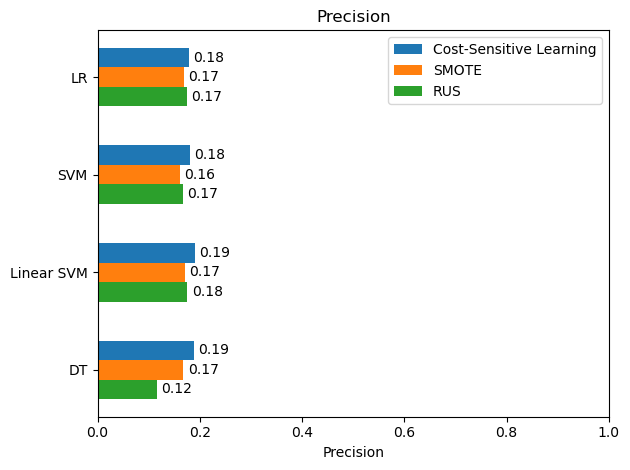

cost_senstive_vs_resampling_recall.png


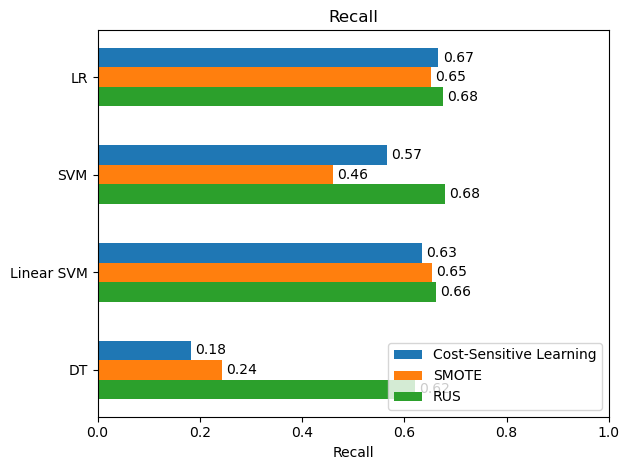

cost_senstive_vs_resampling_f05.png


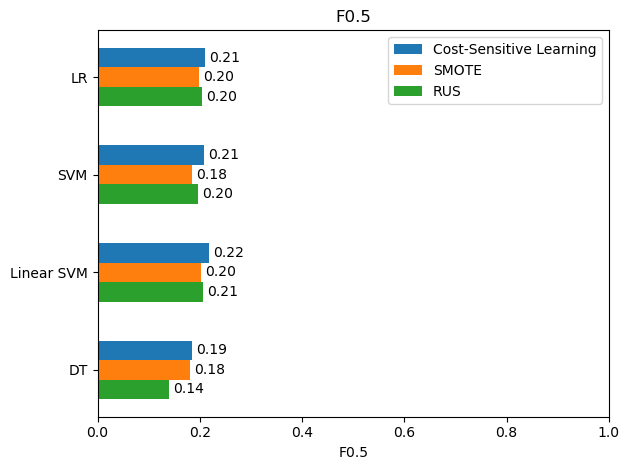

In [60]:
# compare Cost sensitive with SMOTE and RUS

threeGroupsBarChart(cs_precision, "Cost-Sensitive Learning",
                    sm_precision, "SMOTE",
                    rus_precision, "RUS",
                    "Precision" , "cost_senstive_vs_resampling_precision")

threeGroupsBarChart(cs_recall, "Cost-Sensitive Learning",
                    sm_recall, "SMOTE", 
                    rus_recall, "RUS",
                    "Recall", "cost_senstive_vs_resampling_recall")

threeGroupsBarChart(cs_f05, "Cost-Sensitive Learning",
                    sm_f05, "SMOTE", 
                    rus_f05, "RUS",
                    "F0.5", "cost_senstive_vs_resampling_f05")

# Find Optimal Class Weights Using Grid Search

## LR

In [64]:
def plotGridSearchOptimalWeight(gridSearch_model, title, name):
    
    #Ploting the score for different values of weight
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,8))
    weigh_data = pd.DataFrame({ 'score': gridSearch_model.cv_results_['mean_test_score'], 'weight': (1- weights)})
    sns.lineplot(weigh_data['weight'], weigh_data['score'])
    plt.xlabel('Weight for class 1')
    plt.ylabel('F0.5 score')
    plt.xticks([round(i/10,1) for i in range(0,11,1)])
    plt.title(title, fontsize=24)
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName)

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(max_iter=5000)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_lr = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


gridSearch_optimalWeights_lr.png


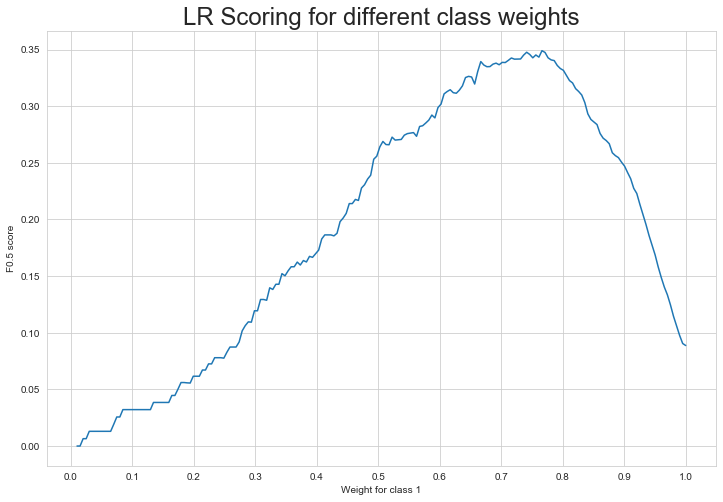

In [65]:
plotGridSearchOptimalWeight(gridsearch_lr, 'LR Scoring for different class weights using BiB data', "gridSearch_optimalWeights_lr")

In [35]:
gridsearch_lr.best_params_

{'class_weight': {0: 0.23381909547738694, 1: 0.7661809045226131}}

In [36]:
optimal_weights = {0: 0.23381909547738694, 1:0.7661809045226131 }
optimal_weights

{0: 0.23381909547738694, 1: 0.7661809045226131}

In [49]:
y_test.value_counts()

0
0    2408
1     188
dtype: int64

F-Measure: 0.406
Recall: 0.351
Precision: 0.423


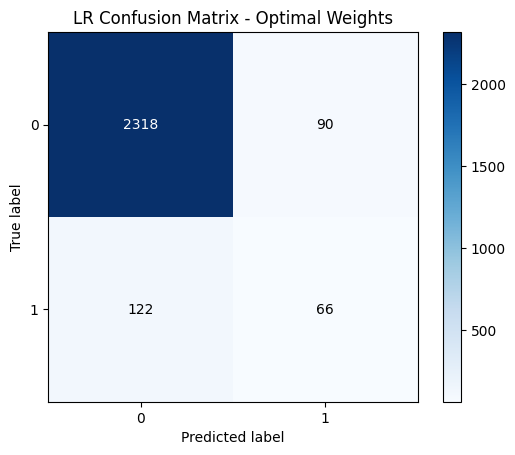

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2408
           1       0.42      0.35      0.38       188

    accuracy                           0.92      2596
   macro avg       0.69      0.66      0.67      2596
weighted avg       0.91      0.92      0.91      2596



In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight={0: 0.23381909547738694, 1: 0.7661809045226131})
lr.fit(X_train, y_train)

# Predicting on the test data
yhat = lr.predict(X_test)

#Calculating and printing the f0.5 score 
print('F-Measure: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat, "LR Confusion Matrix - Optimal Weights","conf_matrix_lr_optimalWeights")

## SVC

In [48]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = SVC()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_svc = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


gridSearch_optimalWeights_svc.png


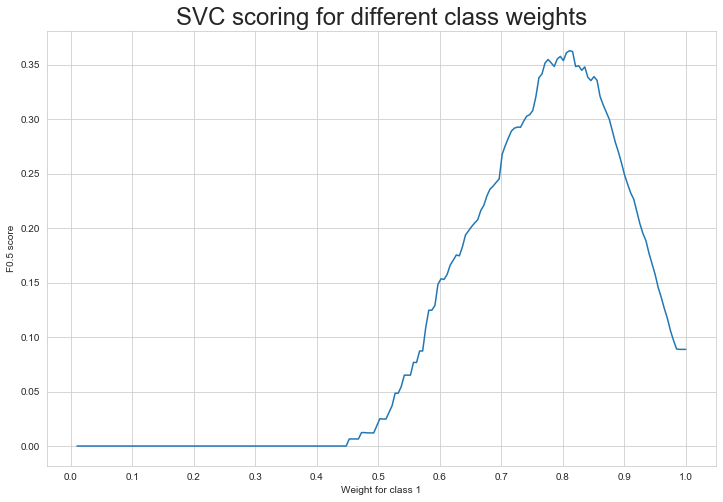

In [66]:
plotGridSearchOptimalWeight(gridsearch_svc, 'SVC scoring for different class weights using BiB data', "gridSearch_optimalWeights_svc")

## Linear SVC

In [50]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = LinearSVC()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_linsvc = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


gridSearch_optimalWeights_linsvc.png


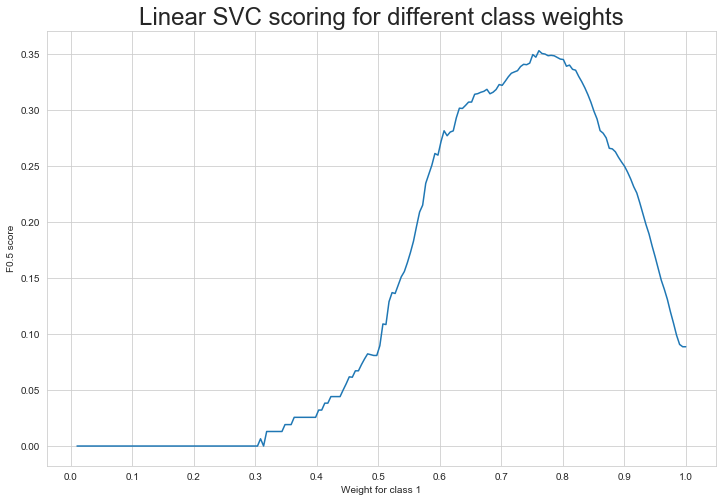

In [67]:
plotGridSearchOptimalWeight(gridsearch_linsvc, 'Linear SVC scoring for different class weights using BiB data', "gridSearch_optimalWeights_linsvc")

## DT

In [52]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = DecisionTreeClassifier()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_dt = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


gridSearch_optimalWeights_dt.png


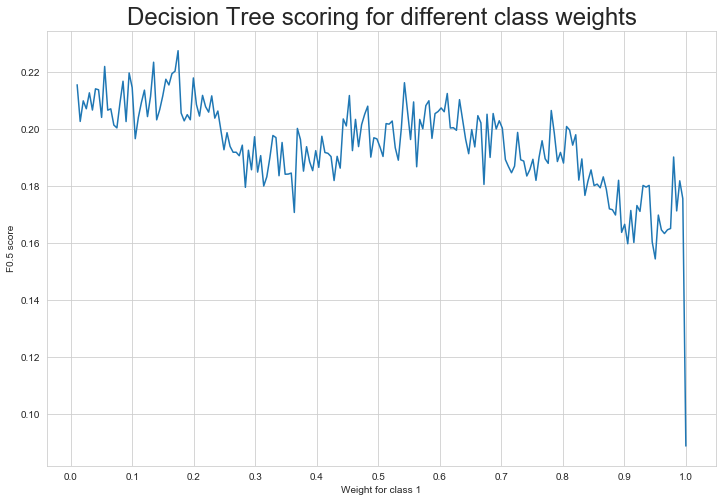

In [68]:
plotGridSearchOptimalWeight(gridsearch_dt, 'Decision Tree scoring for different class weights using BiB data', "gridSearch_optimalWeights_dt")

In [54]:
gridsearch_lr.best_params_

{'class_weight': {0: 0.23381909547738694, 1: 0.7661809045226131}}

In [55]:
gridsearch_svc.best_params_

{'class_weight': {0: 0.18904522613065328, 1: 0.8109547738693468}}

In [56]:
gridsearch_linsvc.best_params_

{'class_weight': {0: 0.23879396984924622, 1: 0.7612060301507537}}

In [57]:
gridsearch_dt.best_params_

{'class_weight': {0: 0.8258291457286432, 1: 0.1741708542713568}}

In [23]:
def compareCostSensitiveAlgorithmsWithOptimalWeights(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression(class_weight={0:0.23381909547738694 , 1:0.7661809045226131 })))
    models.append(('SVM', SVC(class_weight={0:0.18904522613065328 , 1: 0.8109547738693468})))
    models.append(('Linear SVC', LinearSVC(class_weight={0:0.23879396984924622 , 1: 0.7612060301507537})))
    models.append(('DT', DecisionTreeClassifier(class_weight={0:0.8258291457286432 , 1:0.1741708542713568 })))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        #print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        #print(recall_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        #print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f05_results, names

In [24]:
cs2_precision, cs2_recall, cs2_f05, names = compareCostSensitiveAlgorithmsWithOptimalWeights(X_train, y_train)

cost_sensitive_tunedWeights_precision.png


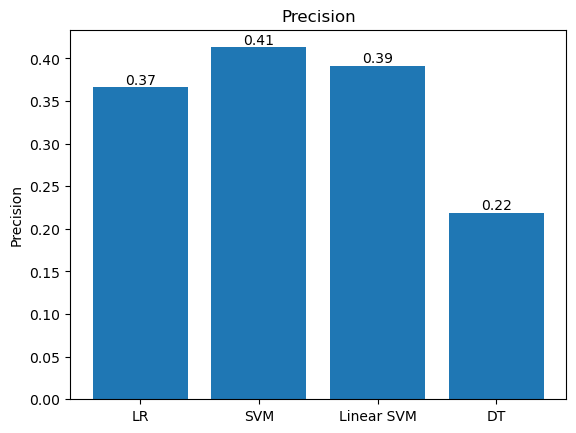

cost_sensitive_tunedWeights_recall.png


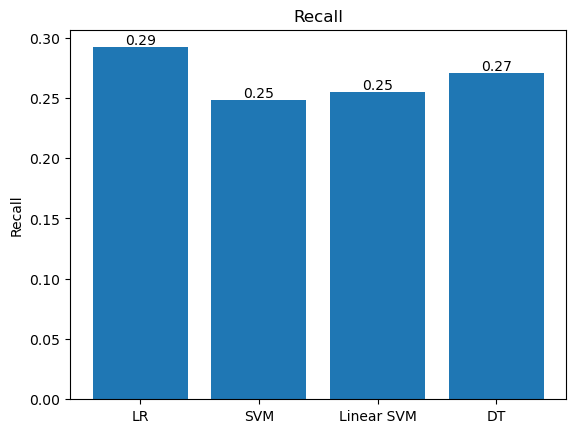

cost_sensitive_tunedWeights_f05.png


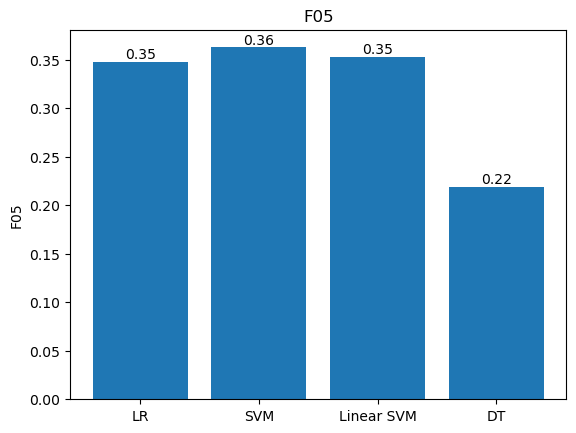

In [55]:
# plot models with tuned cost weights alone

barChart(cs2_precision, "Precision", "cost_sensitive_tunedWeights_precision")
barChart(cs2_recall, "Recall", "cost_sensitive_tunedWeights_recall")
barChart(cs2_f05, "F05", "cost_sensitive_tunedWeights_f05")

cost_sensitive_balanced_vs_optimal_precision.png


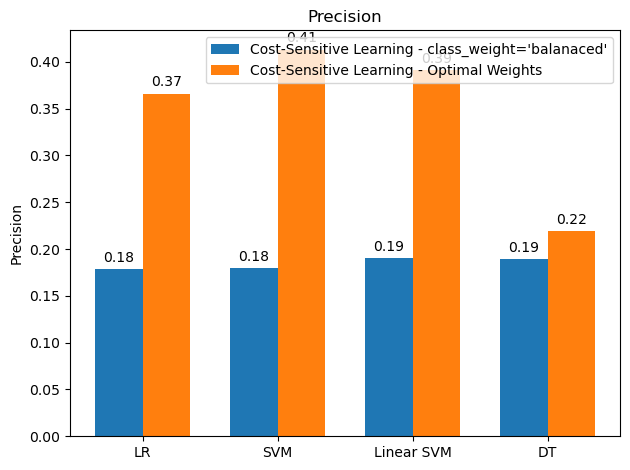

cost_sensitive_balanced_vs_optimal_recall.png


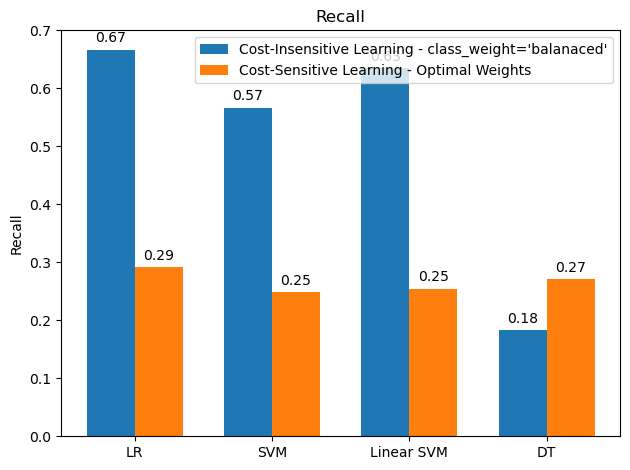

cost_sensitive_balanced_vs_optimal_f05.png


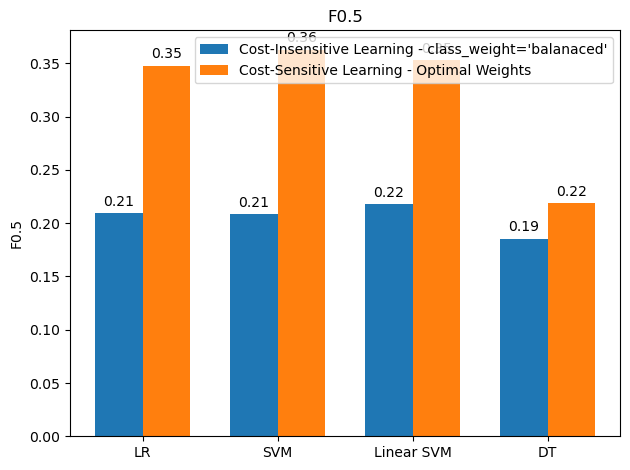

In [25]:
# plot cost sensitive with Optimal Weights vs. sensitive learning with class_weight='balanced'

twoGroupsBarChart(cs_precision, "Cost-Sensitive Learning - class_weight='balanaced'",
                 cs2_precision, "Cost-Sensitive Learning - Optimal Weights", "Precision",
                 "cost_sensitive_balanced_vs_optimal_precision")
twoGroupsBarChart(cs_recall, "Cost-Insensitive Learning - class_weight='balanaced'",
                 cs2_recall, "Cost-Sensitive Learning - Optimal Weights", "Recall",
                 "cost_sensitive_balanced_vs_optimal_recall")
twoGroupsBarChart(cs_f05, "Cost-Insensitive Learning - class_weight='balanaced'",
                 cs2_f05, "Cost-Sensitive Learning - Optimal Weights", "F0.5",
                 "cost_sensitive_balanced_vs_optimal_f05")

cost_sensitive_optimal_vs_insensitive_precision.png


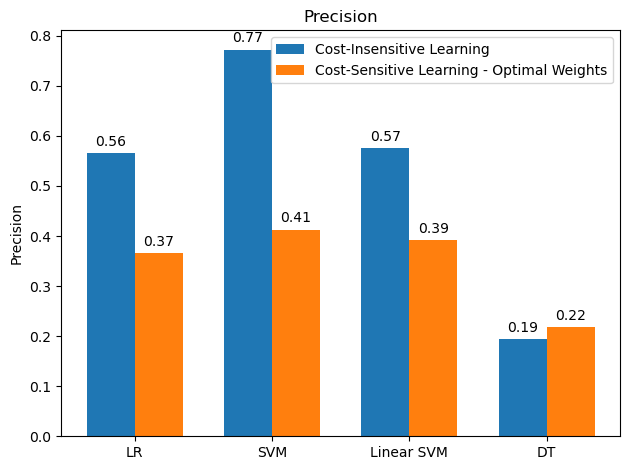

cost_sensitive_optimal_vs_insensitive_recall.png


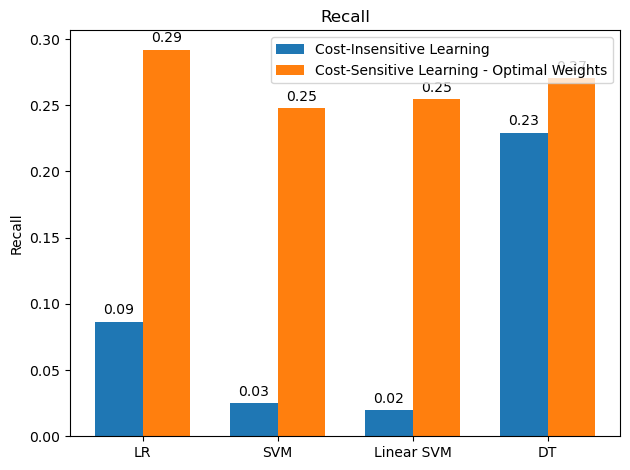

cost_sensitive_optimal_vs_insensitive_f05.png


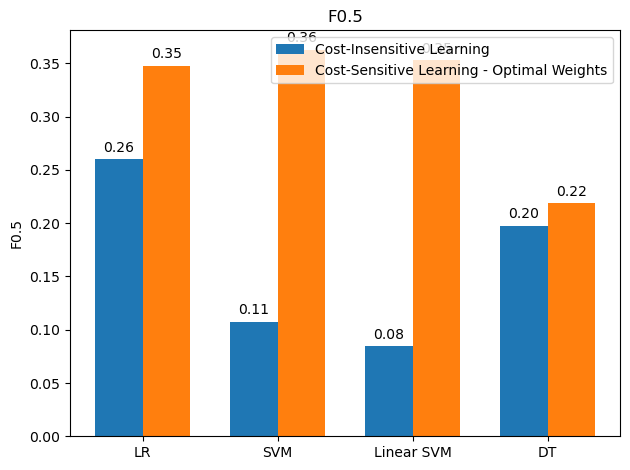

In [26]:
# plot cost sensitive with Optimal Weights vs. insensitive learning
twoGroupsBarChart(precision, "Cost-Insensitive Learning", cs2_precision, "Cost-Sensitive Learning - Optimal Weights", "Precision",
                 "cost_sensitive_optimal_vs_insensitive_precision")
twoGroupsBarChart(recall, "Cost-Insensitive Learning", cs2_recall, "Cost-Sensitive Learning - Optimal Weights", "Recall",
                 "cost_sensitive_optimal_vs_insensitive_recall")
twoGroupsBarChart(f05, "Cost-Insensitive Learning", cs2_f05, "Cost-Sensitive Learning - Optimal Weights", "F0.5",
                 "cost_sensitive_optimal_vs_insensitive_f05")

precision_baseline_vs_cost_sensitive_balanced_vs_optimal.png


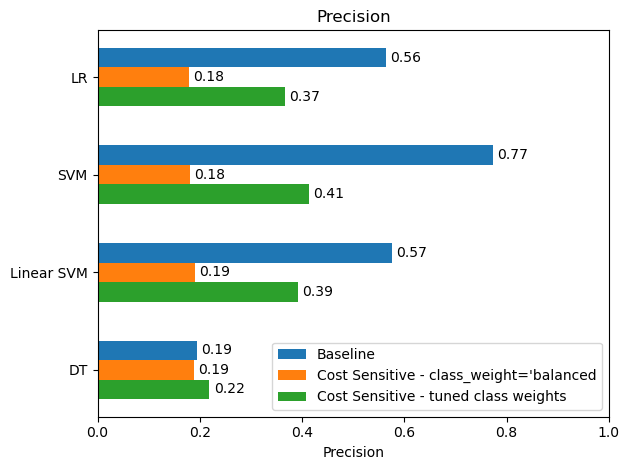

recall_baseline_vs_cost_sensitive_balanced_vs_optimal.png


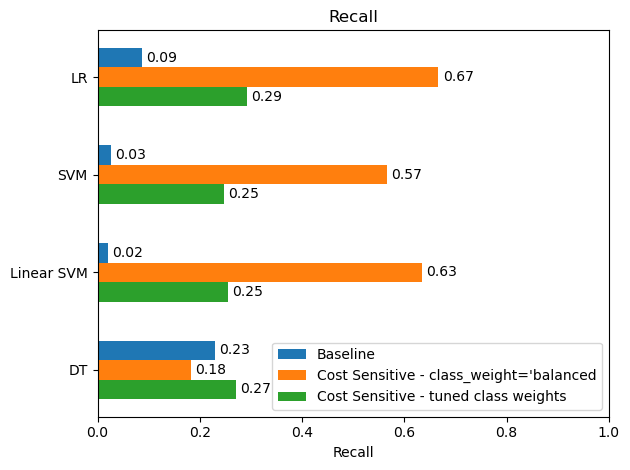

f05_baseline_vs_cost_sensitive_balanced_vs_optimal.png


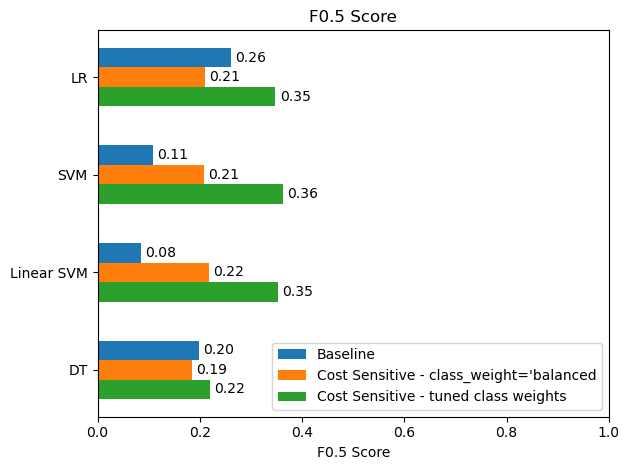

In [61]:
# plot baseline vs cost-sensitive balanced vs cost-sensitive optimal

threeGroupsBarChart(precision, "Baseline",
                    cs_precision, "Cost Sensitive - class_weight='balanced",
                    cs2_precision, "Cost Sensitive - tuned class weights",
                    "Precision", "precision_baseline_vs_cost_sensitive_balanced_vs_optimal")

threeGroupsBarChart(recall, "Baseline",
                    cs_recall, "Cost Sensitive - class_weight='balanced",
                    cs2_recall, "Cost Sensitive - tuned class weights",
                    "Recall", "recall_baseline_vs_cost_sensitive_balanced_vs_optimal")

threeGroupsBarChart(f05, "Baseline",
                    cs_f05, "Cost Sensitive - class_weight='balanced",
                    cs2_f05, "Cost Sensitive - tuned class weights",
                    "F0.5 Score", "f05_baseline_vs_cost_sensitive_balanced_vs_optimal")

cost_sensitive_optimal_vs_resampling_precision.png


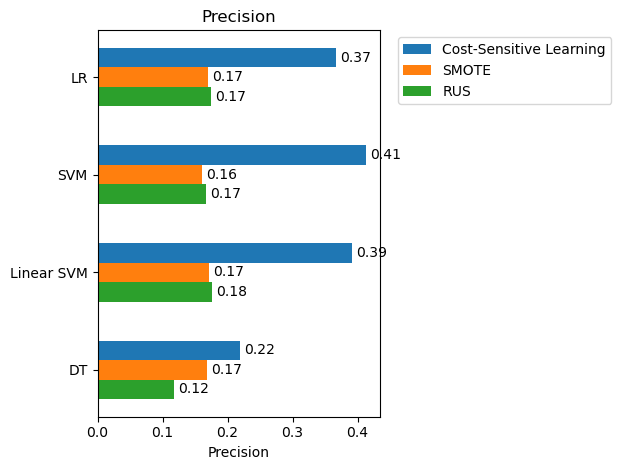

cost_sensitive_optimal_vs_resampling_recall.png


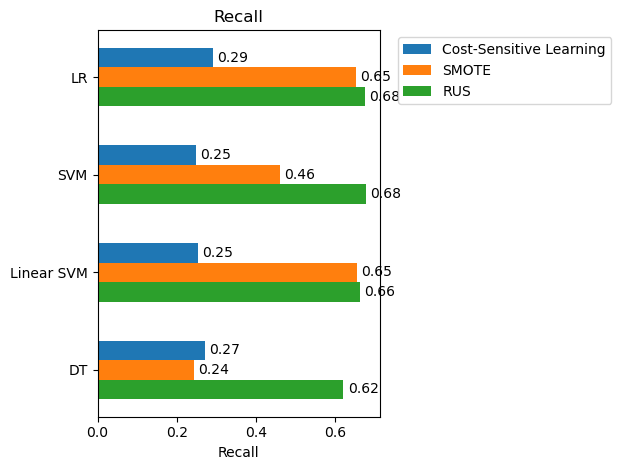

cost_sensitive_optimal_vs_resampling_f05.png


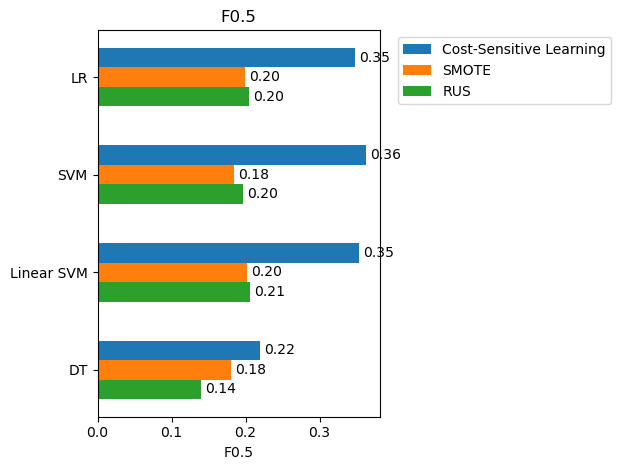

In [48]:
# plot cost sensitive with Optimal Weights vs. SMOTE and RUS

threeGroupsBarChart(cs2_precision, "Cost-Sensitive Learning",
                    sm_precision, "SMOTE",
                    rus_precision, "RUS",
                    "Precision", "cost_sensitive_optimal_vs_resampling_precision")

threeGroupsBarChart(cs2_recall, "Cost-Sensitive Learning",
                    sm_recall, "SMOTE", 
                    rus_recall, "RUS",
                    "Recall", "cost_sensitive_optimal_vs_resampling_recall")

threeGroupsBarChart(cs2_f05, "Cost-Sensitive Learning",
                    sm_f05, "SMOTE", 
                    rus_f05, "RUS",
                    "F0.5", "cost_sensitive_optimal_vs_resampling_f05")